### UNSUPERVISED LEARNING

Both labeled.csv and unlabeled.csv were used to train the autoencoder, and only labeled.csv to train the classifiers. Finally, we will evaluate the trained classifier on the test dataset est.csv

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm as cm
from sklearn.decomposition import PCA


In [4]:
labeled_data=pd.read_csv('labeled.csv')
Unlabeled_data=pd.read_csv('unlabeled.csv')
test_data=pd.read_csv('test.csv')

In [5]:

 
X_labeled = np.array(labeled_data.iloc[:,1:]) #pixels
Y_labeled= np.array(labeled_data.iloc[:,0]) #lables
X_unlabeled=np.array(Unlabeled_data.iloc[:,1:])
# Check the number of features in both datasets
if X_labeled.shape[1] > X_unlabeled.shape[1]:
    # Add a placeholder column to X_unlabeled to match the number of features
    extra_column = np.zeros((X_unlabeled.shape[0], 1))
    X_unlabeled = np.hstack((X_unlabeled, extra_column))
combined_data=np.concatenate((X_labeled,X_unlabeled),axis=0)


#### II Train an autoencoder with only one hidden layer and change the number of its neurons to 20,60, 100, ..., 220 (i.e. from 20 to 220 with a step size of 40)

#### III For each model in Step II, we calculate and record the reconstruction error for the autoencoder,which is simply the average of Euclidian distances between the input and output of the autoencoder.

Training Autoencoder with 20 neurons
Reconstruction Error for 20 Neurons: 1907.5190482840144
Training Autoencoder with 60 neurons
Reconstruction Error for 60 Neurons: 839.1969637064948
Training Autoencoder with 100 neurons
Reconstruction Error for 100 Neurons: 515.8242218069988
Training Autoencoder with 140 neurons
Reconstruction Error for 140 Neurons: 374.2169614438736
Training Autoencoder with 180 neurons
Reconstruction Error for 180 Neurons: 311.8416408080033
Training Autoencoder with 220 neurons
Reconstruction Error for 220 Neurons: 288.08429092028535
[1907.5190482840144, 839.1969637064948, 515.8242218069988, 374.2169614438736, 311.8416408080033, 288.08429092028535]


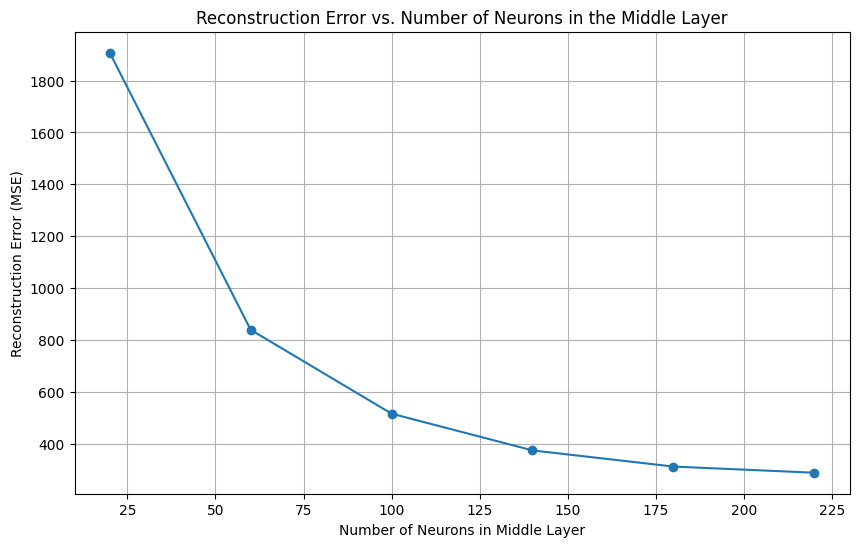

In [17]:
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

autoencoder_models=[]

# Setting the range of neuron numbers 
neuron_numbers = range(20, 221, 40)

# Initialize a list to store reconstruction errors for each configuration
reconstruction_errors = []


# Iterate over different numbers of neurons
for num_neurons in neuron_numbers:
    print(f"Training Autoencoder with {num_neurons} neurons")
    
    # Define and train the autoencoder
    autoencoder = MLPRegressor(
        hidden_layer_sizes=(num_neurons,),
        max_iter=1000,
        random_state=42,
    )
    
    model=autoencoder.fit(combined_data, combined_data)  # Train the autoencoder with combined data
    autoencoder_models.append(model)
    # Use the trained autoencoder to reconstruct data
    reconstructed_data = autoencoder.predict(test_data.iloc[:, 1:])
    
    # Calculate the reconstruction error (MSE) and record it
    reconstruction_error = mean_squared_error(test_data.iloc[:, 1:], reconstructed_data)
    
    reconstruction_errors.append(reconstruction_error)
    
    print(f"Reconstruction Error for {num_neurons} Neurons: {reconstruction_error}")

print(reconstruction_errors)
plt.figure(figsize=(10, 6))
plt.plot(neuron_numbers, reconstruction_errors, marker='o', linestyle='-')
plt.title('Reconstruction Error vs. Number of Neurons in the Middle Layer')
plt.xlabel('Number of Neurons in Middle Layer')
plt.ylabel('Reconstruction Error (MSE)')
plt.grid(True)
plt.show()

Based on the plot of reconstruction error vs. number of neurons in the middle layer, we can see that the reconstruction error decreases as the number of neurons in the middle layer increases. This is because the middle layer of a neural network is responsible for learning the complex relationships between the input and output data. With more neurons in the middle layer, the network is able to learn more complex relationships, which results in lower reconstruction error.
Overall, the plot shows that the number of neurons in the middle layer is an important factor in determining the reconstruction error of a neural network. However, it is important to choose the correct number of neurons to avoid overfitting.

In the plot, the reconstruction error decreases sharply for the first few values of the number of neurons in the middle layer. This suggests that the network is able to learn the basic relationships between the input and output data with just a few neurons. However, as the number of neurons increases, the reconstruction error decreases more slowly. This suggests that the network is learning more complex relationships between the input and output data with more neurons.

The plot also shows that the reconstruction error reaches a minimum value for a certain number of neurons in the middle layer. This suggests that the network is able to best represent the input data with this number of neurons. 

#### Building the 3-layer NN to build a classification model using all the original attributes from the training set and change the number of its neurons to 20, 60, 100, ..., 220 (i.e. from 20 to 220 with a step size of 40). For each model, calculate and record the test error

In [7]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Define the range of neuron numbers to explore
neuron_numbers = range(20, 221, 40)
test_errors_NN = []

# Iterate over different numbers of neurons
for num_neurons in neuron_numbers:
    print(f"Training MLP Classifier with {num_neurons} neurons")

    # Create an MLP Classifier with the specified number of neurons in the hidden layer
    classifier = MLPClassifier(hidden_layer_sizes=(num_neurons,), max_iter=1000, random_state=42)

    # Train the classifier on the labeled training data
    classifier.fit(X_labeled, Y_labeled)

    # Make predictions on the test data
    y_pred = classifier.predict(test_data.iloc[:, 1:])

    # Calculate test error (classification accuracy)
    test_error = 1 - accuracy_score(test_data['label'], y_pred)
    print(f'Test Error: {test_error}')

    # Record the test error
    test_errors_NN.append(test_error)






Training MLP Classifier with 20 neurons
Test Error: 0.63
Training MLP Classifier with 60 neurons
Test Error: 0.55
Training MLP Classifier with 100 neurons
Test Error: 0.5780000000000001
Training MLP Classifier with 140 neurons
Test Error: 0.5660000000000001
Training MLP Classifier with 180 neurons
Test Error: 0.528
Training MLP Classifier with 220 neurons
Test Error: 0.538


#### augmented self-taught networks using the models learnt . For each model:


In [9]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.metrics import accuracy_score


# Set the range of neuron numbers to explore
neuron_numbers = range(20, 221, 40)
test_errors_A = []

# Iterate over different numbers of neurons
for num_neurons in neuron_numbers:
    print(f"Training Autoencoder with {num_neurons} neurons")

    # Define and train the autoencoder
    autoencoder1 = MLPRegressor(
        hidden_layer_sizes=(num_neurons,),
        activation='relu',
        max_iter=1000,
        random_state=42,
    )

    # Training the autoencoder with combined data (labeled and unlabeled data)
    autoencoder1.fit(combined_data, combined_data)

    # Using the trained autoencoder to generate features for both training and test data
    train_features_autoencoder = np.maximum(0, np.dot(X_labeled, autoencoder1.coefs_[0]) + autoencoder1.intercepts_[0])
    test_features_autoencoder = np.maximum(0, np.dot(test_data.iloc[:, 1:], autoencoder1.coefs_[0]) + autoencoder1.intercepts_[0])

     # Combine the autoencoder features with the original features
    train_features_combined = np.concatenate((X_labeled, train_features_autoencoder), axis=1)
    test_features_combined = np.concatenate((test_data.iloc[:, 1:], test_features_autoencoder), axis=1)
    
    # Create a new MLP Classifier and train it on the training data
    classifier = MLPClassifier(hidden_layer_sizes=(num_neurons,), max_iter=1000, random_state=42)
    # Train the classifier on the training data with the combined features
    classifier.fit(train_features_combined, Y_labeled)

    # Make predictions on the test data
    y_pred = classifier.predict(test_features_combined)

    # Calculate test error (classification accuracy)
    test_error = 1 - accuracy_score(test_data['label'], y_pred)
    print(f'Test Error: {test_error}')
    # Record the test error
    test_errors_A.append(test_error)


Training Autoencoder with 20 neurons
Test Error: 0.756
Training Autoencoder with 60 neurons
Test Error: 0.596
Training Autoencoder with 100 neurons
Test Error: 0.476
Training Autoencoder with 140 neurons
Test Error: 0.554
Training Autoencoder with 180 neurons
Test Error: 0.46199999999999997
Training Autoencoder with 220 neurons
Test Error: 0.43999999999999995


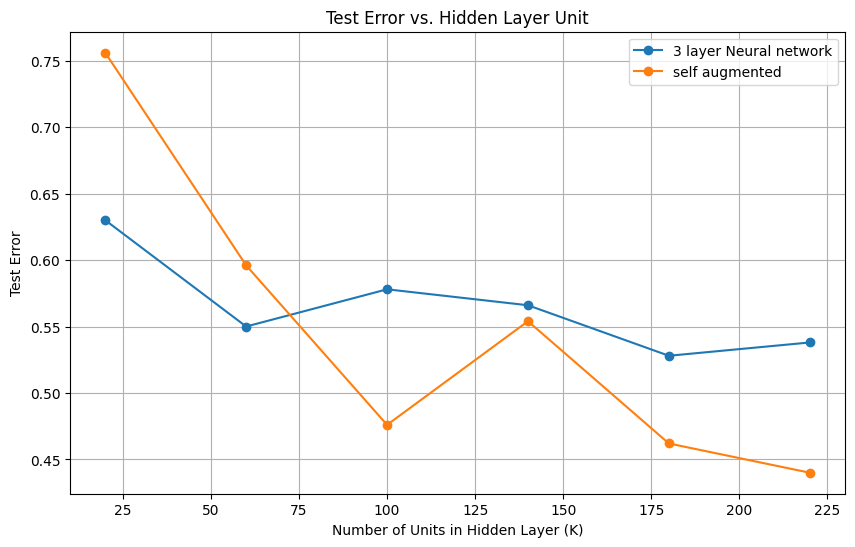

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(neuron_numbers, test_errors_NN, marker='o', label='3 layer Neural network')
plt.plot(neuron_numbers, test_errors_A, marker='o', label='self augmented')
plt.title('Test Error vs. Hidden Layer Unit')
plt.xlabel('Number of Units in Hidden Layer (K)')
plt.ylabel('Test Error')
plt.legend()
plt.grid(True)
plt.show()

The plot shows the test error of a 3-layer neural network (MLP classifier) and an augmented self-taught network as a function of the number of hidden layer neurons. The test error is a measure of how well the model performs on new data that it has never seen before.

The plot shows that the 3-layer neural network has a higher test error than the augmented self-taught network for models with 75 hidden layers and higher. This means that the augmented self-taught network is better at generalizing to new data.

The reason for the difference in performance is that the augmented self-taught network is better at learning complex relationships between the input and output data. And augmented self-taught network is less likely to overfit the training data. Augmented self-taught networks are a type of neural network that is trained using a combination of supervised and unsupervised learning. In supervised learning, the network is trained on a labeled dataset, where each input example has a corresponding output label. In unsupervised learning, the network is trained on an unlabeled dataset, where the output labels are not known.

Overall, the plot shows that augmented self-taught networks can outperform 3-layer neural networks on tasks where the training data is limited or complex.